<a href="https://colab.research.google.com/github/RodrigoCODe/INMERSION_DATOS_ALURA/blob/master/Solucion_clase2_alarcon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

inmuebles = pd.read_csv('/content/drive/MyDrive/Curso Inmersion de datos con python/inmuebles_bogota.csv')

In [3]:
columnas = {'Baños':'Banos','Área':'Area' }

inmuebles = inmuebles.rename(columns=columnas)

In [9]:
valor_data = inmuebles.Valor.str.split(expand=True)

#Se agregan columnas 'Moneda' y 'Precio'
inmuebles['Moneda'] = valor_data[0]
inmuebles['Precio'] = valor_data[1]
inmuebles['Precio'] = inmuebles['Precio'].str.replace('.','',regex=True)
inmuebles['Precio_millon'] = inmuebles.Precio.astype('float') / 1000000



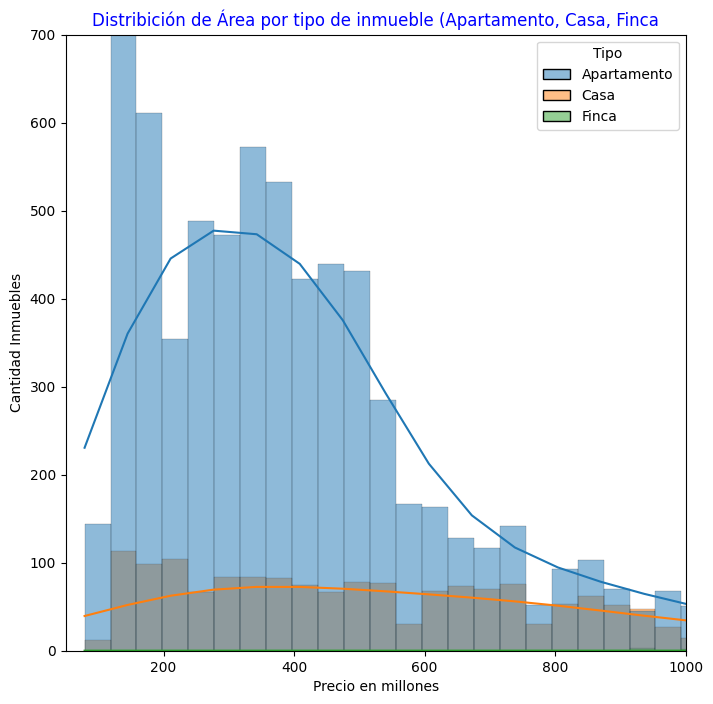

In [12]:
#Desafio 1:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))

grafico_distribucion = sns.histplot(
                x="Precio_millon",
                hue="Tipo", 
                data=inmuebles.loc[inmuebles.Tipo.isin(['Apartamento','Casa', 'Finca'])],
                kde=True
                )
grafico_distribucion.set_title('Distribición de Área por tipo de inmueble (Apartamento, Casa, Finca',color='blue')
plt.xlim(50,1000)
plt.ylim(0,700)
plt.xlabel("Precio en millones")
plt.ylabel('Cantidad Inmuebles',fontsize=10)
plt.show()

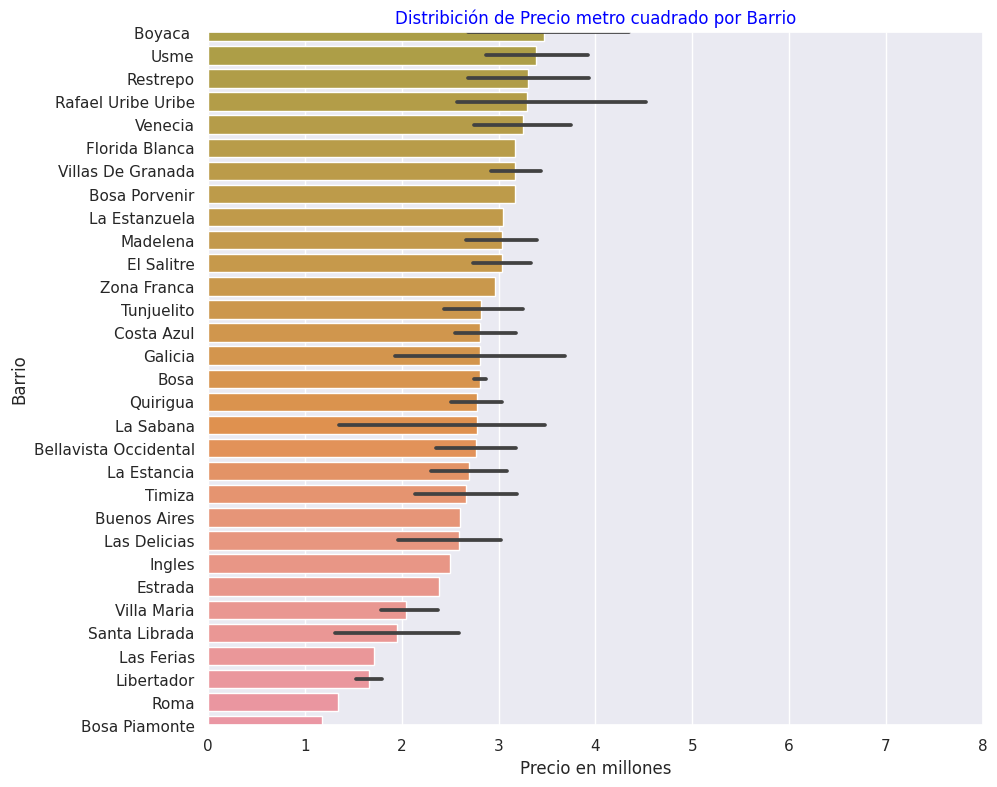

In [14]:
#Deafio 2:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,9))

inmuebles['Precio_m2'] = inmuebles['Precio_millon'] / inmuebles['Area']

barrios_precios_m2 = inmuebles.groupby('Barrio')['Precio_m2'].mean().sort_values()

figura2 = sns.barplot(data=inmuebles, x='Precio_m2',y='Barrio', order=barrios_precios_m2.index)

sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)
figura2.set_title('Distribición de Precio metro cuadrado por Barrio',color='blue')
plt.xlabel('Precio en millones')
plt.ylim(0,30)
plt.xlim(0,8)

plt.show()